In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns


In [5]:
defo = "output_data/deforestation_merge.csv"
defo_df = pd.read_csv(defo)
defo_df


,state,year,square km
0,AC,1998,536.0
1,AC,1999,441.0
2,AC,2000,547.0
3,AC,2001,419.0
4,AC,2002,883.0
...,...,...,...
175,TO,2013,74.0
176,TO,2014,50.0
177,TO,2015,57.0
178,TO,2016,58.0


In [6]:
rain = "output_data/amazon_precipitation.csv"
rain_df = pd.read_csv(rain)
rain_df = rain_df[["state", "year", "precipitation" ]]

In [7]:
rain_df

,state,year,precipitation
0,AC,1998,2296.1
1,AC,1999,2182.2
2,AC,2000,1703.5
3,AC,2001,1926.9
4,AC,2002,1909.9
...,...,...,...
155,TO,2013,1849.3
156,TO,2014,1843.9
157,TO,2015,1393.7
158,TO,2016,1270.5


In [11]:
defo_rain_df = pd.merge(defo_df, rain_df, on=['year', 'state'])
defo_rain_df

,state,year,square km,precipitation
0,AC,1998,536.0,2296.1
1,AC,1999,441.0,2182.2
2,AC,2000,547.0,1703.5
3,AC,2001,419.0,1926.9
4,AC,2002,883.0,1909.9
...,...,...,...,...
155,TO,2013,74.0,1849.3
156,TO,2014,50.0,1843.9
157,TO,2015,57.0,1393.7
158,TO,2016,58.0,1270.5


In [25]:
defo_rain_group_df = defo_rain_df.groupby(["year"])
defo_rain_sum_df = defo_rain_group_df.sum()
defo_rain_sum_df = pd.DataFrame(defo_rain_sum_df).reset_index()

defo_rain_sum_df

,year,square km,precipitation
0,1998,15342.0,16444.3
1,1999,14901.0,18499.7
2,2000,15761.0,18510.7
3,2001,15492.0,16345.5
4,2002,18551.0,15949.3
5,2003,21799.0,15834.6
6,2004,23914.0,17218.5
7,2005,15770.0,16782.1
8,2006,12237.0,19357.0
9,2007,10040.0,17513.3


In [26]:
x_axis = list(defo_rain_df.year)
tick_locations = [value for value in x_axis]

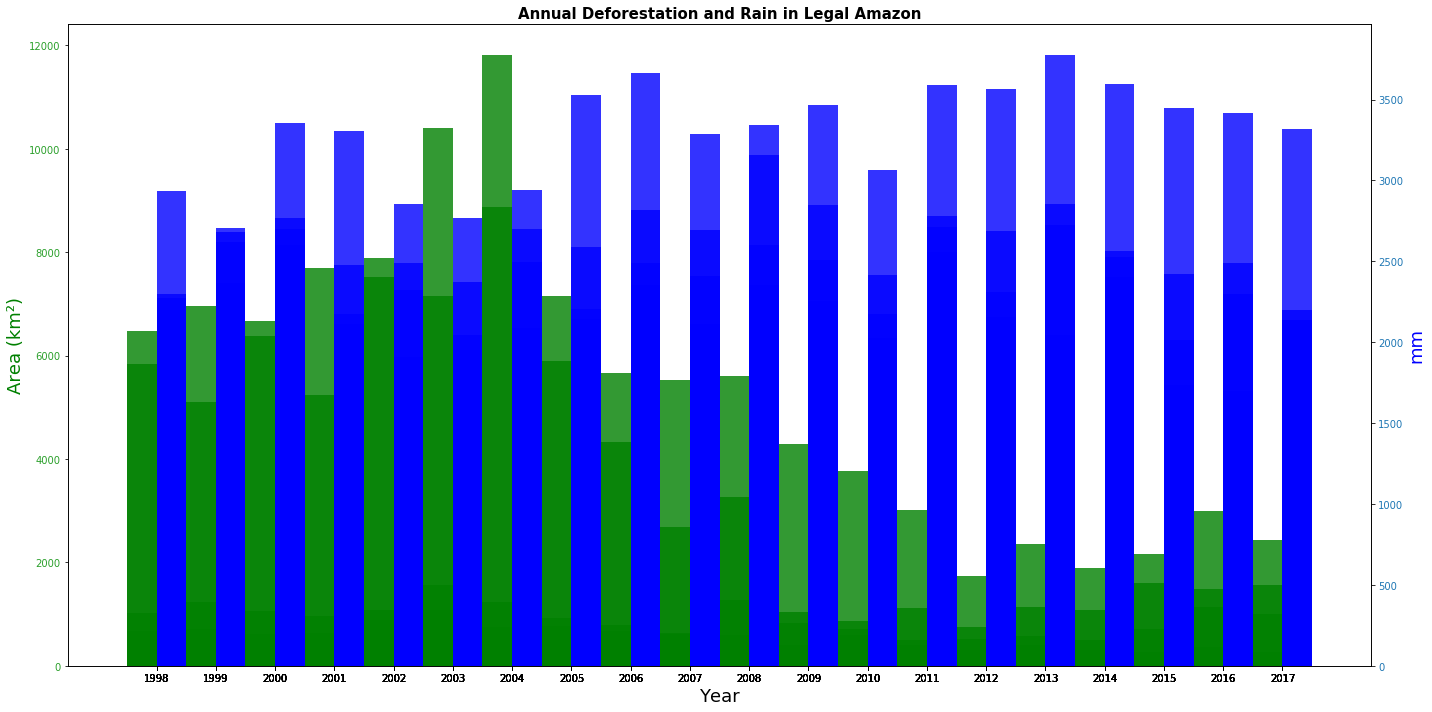

In [78]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in defo_rain_df.iterrows():
    def_graph = ax1.bar(defo_rain_df["year"][index], defo_rain_df["square km"][index],  color='g', alpha=.8, align="edge",width=-0.5)
ax1.set_title("Annual Deforestation and Rain in Legal Amazon", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("Year",fontsize = 18)
ax1.set_ylabel("Area (km²)",fontsize = 18, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green')

# Rain
ax2 = ax1.twinx()
for index, row in defo_rain_df.iterrows():
    rain_graph = ax2.bar(defo_rain_df["year"][index], defo_rain_df["precipitation"][index],  color='b', alpha=.8, align="edge", width=0.5)
ax2.set_ylabel("mm",fontsize = 18, color ='b')
ax2.tick_params(axis='y',labelcolor='tab:blue')

#other configurations
plt.xticks(tick_locations, x_axis, rotation=90)
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("output_data/defor_year.png", dpi=fig.dpi)
plt.show()